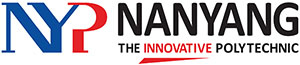


# Practical: Artificial Neural Network (ANN) - Optimizer


# Objectives

- Understand the optimization process
- Demonstrate the use of Stochastic Gradient Descent optimizer.
- Demonstrate the effects of momentum on the optimization process.

# Optimizer

In a neural network, the set of weights represents the experience and insights gained from the training process. The learning process depends on the use of a loss function and optimization process to find the best set of weights that minimizes the loss function.

Previously we have already made use of an optimizer when we use the TensorFlow estimator to create a neural network.
In this session, we will take a closer look at the operations of _Stochastic Gradient Descent_ optimizer.

Consider the following equation:

$${y = (x-3)^2 + x}$$

The question is, __what is the value of x such that y is the smallest value possible?__

Since we know the equation, we can differentiate the equation and set it to 0.

$${\frac{dy}{dx} = 2(x-3) + 1 = 0}$$
$${x = 2.5}$$

In real-life, we do not know the equation, all we have are a bunch of data. There might exists an equation but it is too complex and may not be differentiable. So we have to rely on machines and optimizers to iteratively run an algorithm that finds the best value of x.

To illustrate, let us now use an optimizer to find the value of x. We will see if the optimizer is able to arrive at the true value of 2.5.

Add the following codes to find the best value of x for a minimal y value.

```python
#Import TensorFlow
import tensorflow as tf

#Create an instance of Stochastic Gradient Descent (SGD) optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
#Initialize the x to be 1.0
x = tf.Variable(1.0)

#Define the function y = (x-3)^2 + x
y = lambda: tf.square(x-3) + x

#Iterate 20 times and see if we can get the value of x=2.5
for i in range(20):
    #Get the optimizer to minimize
    step_count = optimizer.minimize(y, [x]).numpy()

#Print the value of x after 20 steps of optimization process
print(x.numpy())
```


In [ ]:
#Enter your codes here



Originally we set the value of x to be 1.0 and after 20 steps of optimization, we get the value to be 2.482706. That is pretty close to our ground truth of 2.5.

Let us now visualize the training process by plotting the values of x as it is being optimized.

Modify your codes as follows to capture the values of x and plot them:

```python
#Import TensorFlow
import tensorflow as tf
#Import matplotlib
import matplotlib.pyplot as plt #<-- Add this line

#Create an instance of Stochastic Gradient Descent (SGD) optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
#Initialize the x to be zero
x = tf.Variable(1.0)

#Define the function y = (x-3)^2 + x
y = lambda: tf.square(x-3) + x

#Create an empty list
values=[] #<-- Add this line
#Iterate 20 times and see if we can get the value of x=2.5
for i in range(20):
    #Get the optimizer to minimize
    step_count = optimizer.minimize(y, [x]).numpy()
    #Add the new x value calculated
    values.append(x.numpy()) #<-- Add this line

#Display the grid
plt.grid(True)
#Plot the values of x
plt.plot(values)
#Show our chart
plt.show()

```

In [ ]:
#Enter your codes here


You should be able to see a graph as follows:

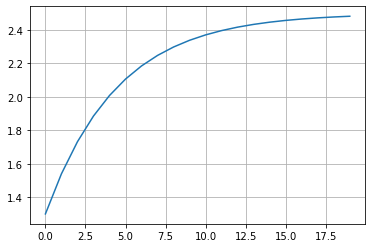

As you can see from the figure, the value of x increases from 1 and after 20 iterations, it reaches a value of about 2.5.




## Exercise

Try to use Tensorboard to display the chart instead instead of matplotlib.

<details>
    <summary><strong>Click here for answer</strong></summary>

```python
import tensorflow as tf
import datetime
import os

# Create an instance of Stochastic Gradient Descent (SGD) optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
# Initialize the x to be zero
x = tf.Variable(1.0)

# Define the function y = (x-3)^2 + x
y = lambda: tf.square(x-3) + x

current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = os.path.join("logs", current_time)
print(log_dir)
summary_writer = tf.summary.create_file_writer(log_dir)


with summary_writer.as_default():
    tf.summary.scalar('loss', 0.345, step=1)
    tf.summary.scalar('loss', 0.234, step=2)
    tf.summary.scalar('loss', 0.123, step=3)


# Create an empty list
# Iterate 20 times and see if we can get the value of x=2.5
for i in range(20):
    #Get the optimizer to minimize
    step_count = optimizer.minimize(y, [x]).numpy()
    with summary_writer.as_default():
      tf.summary.scalar("x", x.numpy(), step=i)

summary_writer.flush()
summary_writer.close()
```

Display the tensorboard using the following commands:

```
%reload_ext tensorboard
%tensorboard --logdir <log directory>
```

Example of log directory : logs/20211012-110612
    
</details>



### The Adam Optimizer

There are other optimizers available in TensorFlow, let us now try another optimizer call _Adam_, it is modified version of SGD and is very popular as an optimizer for deep learning.


Modify your codes and change the line

```python
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
```

to

```python
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
```

Re-run your codes and what do you see in the graph?  You should notice that it has overshot 2.5 and went above 2.6.

### Changing Learning Iterations

Increase the iteration from 20 to 100 by modifying the line:

```python
for i in range(20):
```

to

```python
for i in range(100):
```

Run the codes again and you should see the following graph:

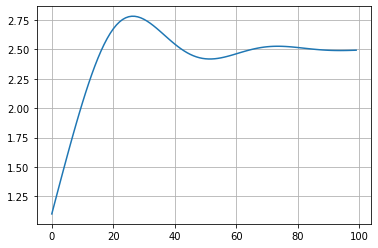

Note how the values moved above 2.5 and falls back again, it oscillates around 2.5 and eventually settles at 2.5.




### Exercise (Effects of Learning Rate)

Change the number of iterations from 100 to 200 and re-run the codes with learning rates of 1, 0.5, 0.1, 0.05. 0.02 and 0.01.

What can you conclude about the effects of learning rates?

<details>
    <summary><strong>Click here for answer</strong></summary>
    
You will notice that with higher values of learning rate, the optimizer tends to overshoot and the value of x oscillates about the actual value. The larger the value of learning rate, the more it will overshoot and oscillates.
    
On the other hand, a smaller value of learning rate will prevent overshoot but it takes longer to advance during each step to reach the final value.
    
</details>

### Momentum

Very often, a graph has more then one minimums. The lowest minimum is called the global minimum while the rest are called the local minimums.

Take a look at the graph below:

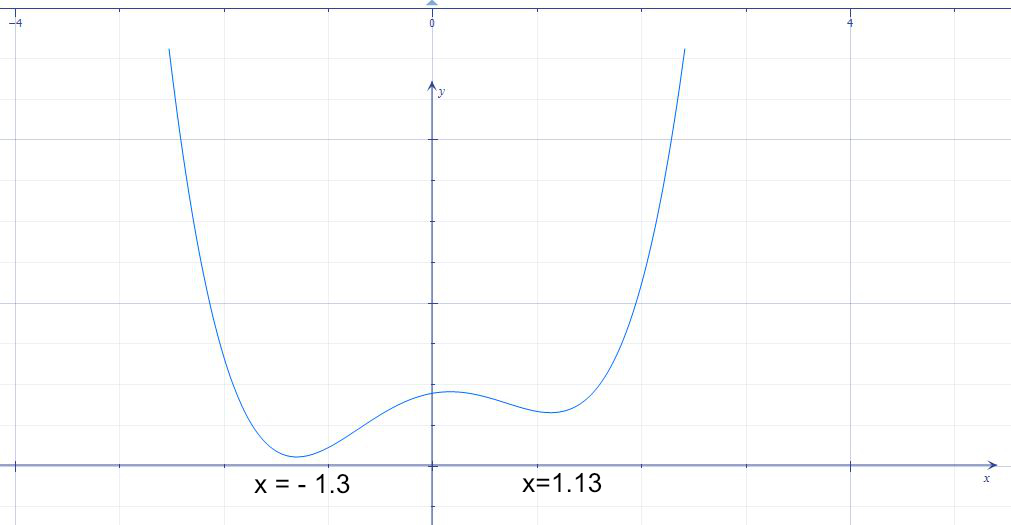


The equation of the graph is 

$${y = x^4 - 3x^2 + x + 4}$$

Notice that there are 2 minimums, one at about x=1.13 and the other at about x= -1.3. The true (global) minimum is when x = -1.3 while the local minimum is at x=1.13. Of course, the best solution is the global minimum.

Let us now see what happens when we try our optimizer with this graph.

Add the following codes to apply our optimizer on this new graph:

```python
import tensorflow as tf
import matplotlib.pyplot as plt

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
#Start our x at 2.0
x = tf.Variable(2.0)
y = lambda: tf.math.pow(x,4) - (3 * tf.square(x)) + x + 4
values = []

for i in range(50):
    step_count = optimizer.minimize(y, [x]).numpy()
    values.append(x.numpy())
    
print(x.numpy())
plt.grid(True)
plt.plot(values)
plt.show()
```


In [ ]:
#Enter your codes here


You should see the following result:

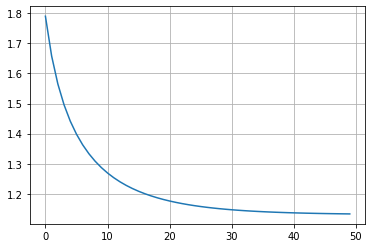

You will notice that since we started from 2.0 which is near to the local minimum, the optimizer is trapped into the local minimum and we end up with solution of x = 1.13 after 50 iterations. This is a good value and a neural network with a local minimum will still work well, however, it is not the best solution.

## Overcoming Local Minimums

How can we help the optimizer to overcome the local minimum and move into the global minimum?  One way is to have a larger learning rate.


Change the learning rate to 0.1 and run your codes again. You should see the following result:

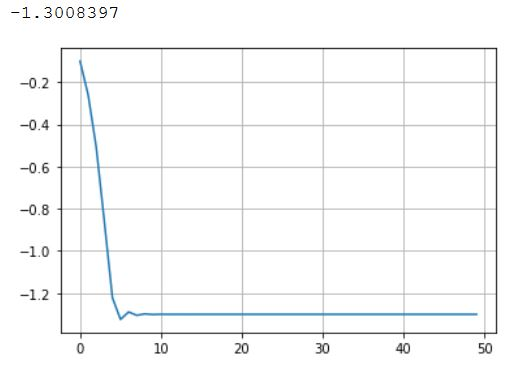

The optimizer is able to find the global minimum with larger values of learning rate. However, as we have seen before, large learning rates may cause the result to oscillate. In fact, with too large a value, we might even not converge to a solution.

In summary, large learning rates means our optimizer is able to converge to a solution faster and are less likely to be trap in a local minimum. On the other hand, too large a value may cause the optimizer to oscillate about a solution is not able to converge to a solution.

## Momentum

Instead of increasing learning rate, we can consider the use of  __momentum__. Momentum is another factor that can help in pushing our optimizer to reach a better (and hopefully global) minimum value. We can set the momentum value in SGD optimizer (_Adam already incorporated momentum in its algorithm so you cannot set momentum for Adam_)

Modify the following line of codes

```python
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
```

to

```python
optimizer = tf.keras.optimizers.SGD(learning_rate=0.02, momentum=0.7)
```

Run your codes again and you should see the following results:

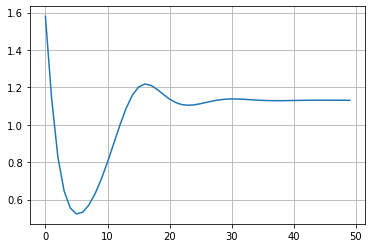




The graph illustrates the effect of momentum, as can be seen from the graph, the momentum pushes the optimizer out of 1.3 and towards the global minimum of -1.3 but unfortunately the push is not hard enough. After reaching below 0.6 it moved towards the local minimum again.

Let us give it a stronger momentum, change the momentum from 0.7 to 0.8 and run the codes again.

You should see the following graph:

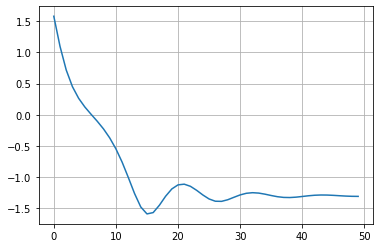

This time, the momentum is strong enough for the optimizer to overcome the local minimum and succesfully reached the global minimum. Note that it oscillates a bit about the global minimum and eventually settles down.

# Conclusion

In this practical, we investigated the use of the optimizers to find values of x that minimizes y based on a y=f(x) equation. Optimizers are important as the backend engine that drive the training process in neural networks. We have seen how the epoch, learning rates and momentum affects the optimizer in the process of optimization. 

We have use the gradient descent and Adam optimizers in the practical.